In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans

In [3]:
raw_data = pd.read_csv("Countries.csv")

In [4]:
raw_data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [5]:
raw_data.shape

(241, 3)

### Plotting the data

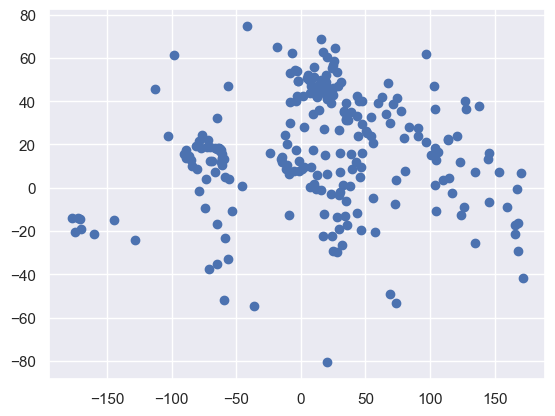

In [7]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'])

In [8]:
cluster_data = raw_data.iloc[:,[1,2]]

In [9]:
cluster_data.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


In [10]:
ss = StandardScaler()
cluster_data = pd.DataFrame(ss.fit_transform(cluster_data), columns=['Longitude', 'Latitude'])

### Clustering

In [22]:
kmeans = KMeans(4)

In [24]:
kmeans.fit(cluster_data)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [26]:
identified_clusters = kmeans.fit_predict(cluster_data)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
identified_clusters

array([0, 1, 2, 0, 3, 3, 3, 1, 0, 3, 0, 2, 2, 2, 0, 2, 3, 3, 2, 3, 0, 0,
       1, 3, 1, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 2, 1, 3, 0, 1, 0, 0,
       2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 3, 3, 3, 1, 0, 3, 0, 3, 0, 3, 1,
       3, 3, 1, 3, 2, 2, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       1, 0, 1, 2, 0, 3, 0, 3, 1, 3, 1, 2, 2, 3, 1, 3, 3, 3, 3, 0, 3, 3,
       1, 1, 3, 2, 3, 1, 0, 0, 1, 3, 1, 1, 3, 0, 3, 0, 3, 1, 2, 3, 3, 3,
       1, 0, 3, 3, 3, 2, 1, 0, 1, 3, 0, 3, 1, 3, 1, 1, 2, 0, 0, 2, 2, 1,
       2, 2, 1, 2, 0, 0, 0, 3, 3, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 2, 3, 0,
       1, 3, 0, 3, 0, 1, 3, 3, 2, 3, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0, 3, 1,
       1, 3, 3, 0, 0, 3, 3, 3, 2, 0, 2, 3, 0, 1, 0, 1, 1, 3, 2, 0, 0, 3,
       3, 1, 2, 2, 3, 0, 0, 3, 3, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 2, 2])

### Clustering results

In [33]:
new_data = raw_data.copy()
new_data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [35]:
new_data['clusterNo'] = identified_clusters

In [39]:
new_data.head()

,name,Longitude,Latitude,clusterNo
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3


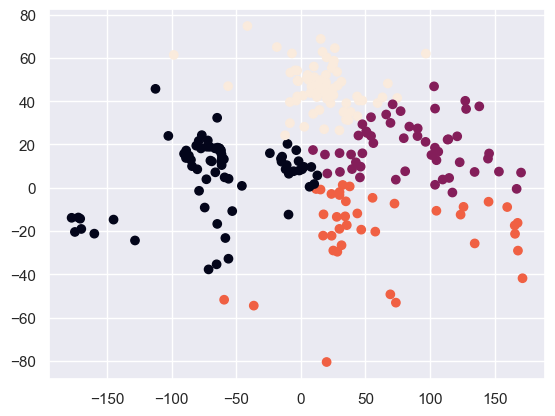

In [45]:
plt.scatter(new_data['Longitude'], new_data['Latitude'], c=new_data['clusterNo'])

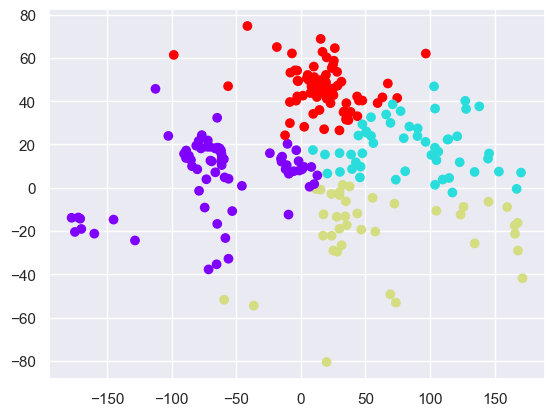

In [47]:
plt.scatter(new_data['Longitude'], new_data['Latitude'], c=new_data['clusterNo'], cmap='rainbow')

### Obtaining the optimal number of clusters

In [52]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(cluster_data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

Text(0, 0.5, 'Within-cluster Sum of Squares')

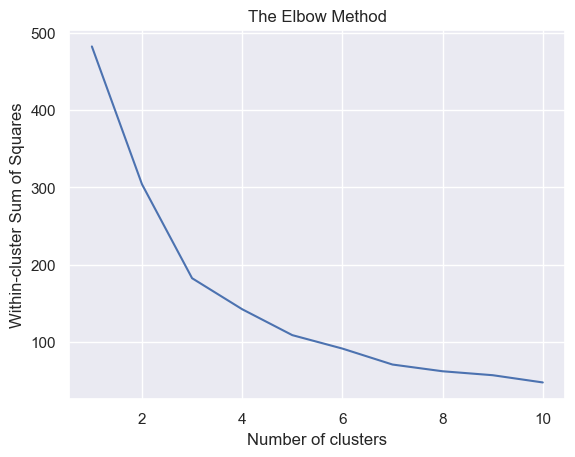

In [54]:
number_clusters = range(1,11) 
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('Within-cluster Sum of Squares')